### **Let check the frame rate and the number of frame on another match of the 20222 world cup.**

In [5]:
#Loader
from kloppy import pff

# paths to data files
roster_path = "/home/student/Documents/AIMS/Intership/pysport/pysport-aims/first_week/data/3812/3812_roster.json"
metadata_path = "/home/student/Documents/AIMS/Intership/pysport/pysport-aims/first_week/data/3812/3812_metadata.json"
raw_data_path = "/home/student/Documents/AIMS/Intership/pysport/pysport-aims/first_week/data/3812/3812.jsonl.bz2"

In [ ]:
# Load the dataset for match ID 3812.
dataset = pff.load_tracking(
    raw_data = raw_data_path,
    meta_data = metadata_path,
    roster_meta_data = roster_path,
    coordinates= "pff",
    limit= None,
    sample_rate= None
)

dataset.to_df().head(10)

,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,ball_speed,13228_x,...,8033_d,8033_s,8326_x,8326_y,8326_d,8326_s,8327_x,8327_y,8327_d,8327_s
0,1,0 days 00:00:00,4226,alive,366,2.46,1.58,0.0,None,14.357,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
1,1,0 days 00:00:00.033041,4227,alive,366,2.04,1.62,0.0,None,14.335,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
2,1,0 days 00:00:00.066408,4228,alive,366,1.62,1.67,0.0,None,14.313,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
3,1,0 days 00:00:00.099774,4229,alive,366,1.20,1.71,0.0,None,14.291,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
4,1,0 days 00:00:00.133141,4230,alive,366,0.78,1.76,0.0,None,14.270,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
5,1,0 days 00:00:00.166508,4231,alive,366,0.36,1.80,0.0,None,14.249,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
6,1,0 days 00:00:00.199875,4232,alive,366,-0.07,1.84,0.0,None,14.227,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
7,1,0 days 00:00:00.233241,4233,alive,366,-0.49,1.89,0.0,None,14.206,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
8,1,0 days 00:00:00.266608,4234,alive,366,-0.91,1.93,0.0,None,14.185,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
9,1,0 days 00:00:00.299975,4235,alive,366,-1.33,1.98,0.0,None,14.164,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None


In [11]:
# check the total number of frame the frame_rate and how many minutes of recording it correspond to.
total_Nframes = len(dataset)    # total number of frame
frame_rate = dataset.frame_rate     #frame_rate
# let now get the equivalent number of minutes recorded.
def what_is_this(Nframes,frame_rate=25):
    total_recorded_time  = Nframes/frame_rate
    time_in_min = total_recorded_time/60                # to get the result in minutes
    print(f"This is the record of around {time_in_min:0.2f} min of the 2022 football world cup match {dataset.metadata.teams[0]} vs {dataset.metadata.teams[1]}")
    print(f"Total number of frame availabe: {Nframes}")
    print(f"recording frequency: {frame_rate}Hz")

what_is_this(total_Nframes,frame_rate)

This is the record of around 56.64 min of the 2022 football world cup match Senegal vs Netherlands
Total number of frame availabe: 101851
recording frequency: 29.97Hz


**It seems like is the provider which doesn't provide the entire record of the match.</br>**
**But since we haven't yet explore the of kloppy to parse the data we can't say it confidently.**

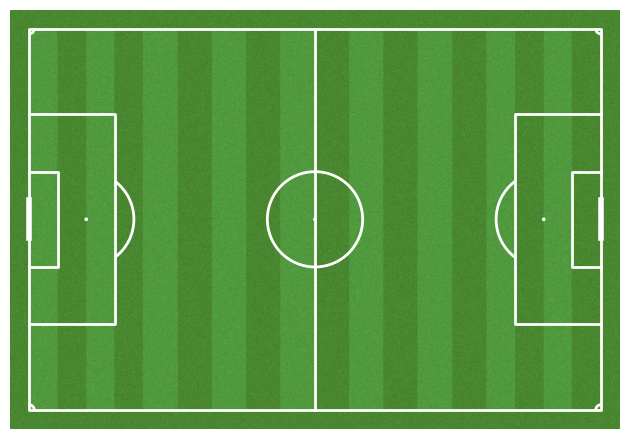

In [25]:
# Good let be a little bit more curious this time around and plot something good with mplscore

# test the if mplsoccer is installed by plotting a pitch as in the documentation.
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True,corner_arcs=True)
fig, ax = pitch.draw()

**Good it's works...**

# Now Let try to plot the players on the first frame as a first step.

### What do we need to know ?
- how to plot a pitch and handle parameters of the pitch like the colors of field and lines the size of the figure.
- how to plot player getting from the dataset on the prepared pitch.
- how to render it. 

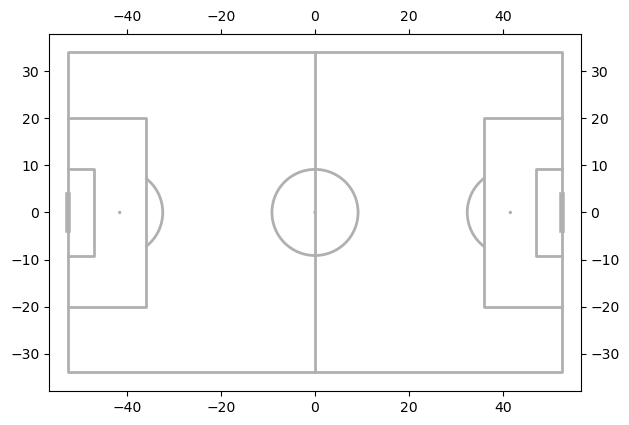

In [26]:
# To create a pitch we need to create an instance of the Pitch class with some arguments
# the type of pitch that we want wich is related to the name of the data provider 
# here we use "skillcorner" insteed to "pff" since they are using the same nomenclature and skillcorner is among the provider supported by mplsoccer.
# we then precise the dimension of the pitch and some optional attributes like the axis and the label on the axis. 
pitch_ = Pitch(
    pitch_type="skillcorner",
    pitch_length=105,
    pitch_width=68,
    axis=True,
    label=True,
    tick=True
)

fig,axs = pitch_.draw()